In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("social_media_data.csv")

In [15]:
# Encoding categorical variables
label_encoder = LabelEncoder()
data['post_type'] = label_encoder.fit_transform(data['post_type'])
data['hashtags'] = data['hashtags'].apply(lambda x: len(x.split(',')))  # Count number of hashtags

In [16]:
# Feature Engineering
features = ['post_type', 'hashtags', 'likes', 'shares', 'comments']
X = data[features]
y_likes = data['likes']
y_comments = data['comments']
y_shares = data['shares']


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y_likes, test_size=0.2, random_state=42)

# Engagement Prediction Model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict likes
y_pred = model.predict(X_test)
print("MSE for Likes Prediction:", mean_squared_error(y_test, y_pred))

MSE for Likes Prediction: 10.99075750000001


  day_of_week       likes      shares    comments
0      Friday  327.423077   71.346154  154.692308
1      Monday  291.125000   72.968750  131.812500
2    Saturday  282.423077   91.500000  164.307692
3      Sunday  270.437500   87.031250  174.031250
4    Thursday  355.115385   68.423077  130.192308
5     Tuesday  276.343750  105.531250  176.656250
6   Wednesday  264.653846  104.730769  146.846154


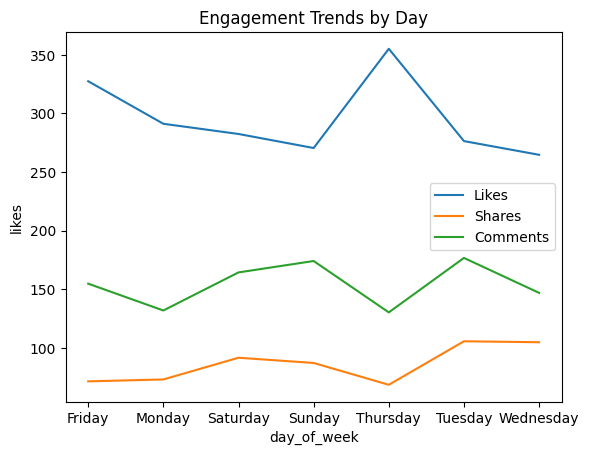

In [18]:
# Time-Based Analysis
def time_based_analysis(data):
    trend = data.groupby('day_of_week')[['likes', 'shares', 'comments']].mean().reset_index()
    print(trend)
    sns.lineplot(x='day_of_week', y='likes', data=trend, label='Likes')
    sns.lineplot(x='day_of_week', y='shares', data=trend, label='Shares')
    sns.lineplot(x='day_of_week', y='comments', data=trend, label='Comments')
    plt.title("Engagement Trends by Day")
    plt.legend()
    plt.show()

time_based_analysis(data)

   hashtags       likes     shares    comments
0         3  275.460526  90.118421  161.631579
1         4  312.666667  84.060606  143.742424
2         5  296.758621  83.379310  158.034483


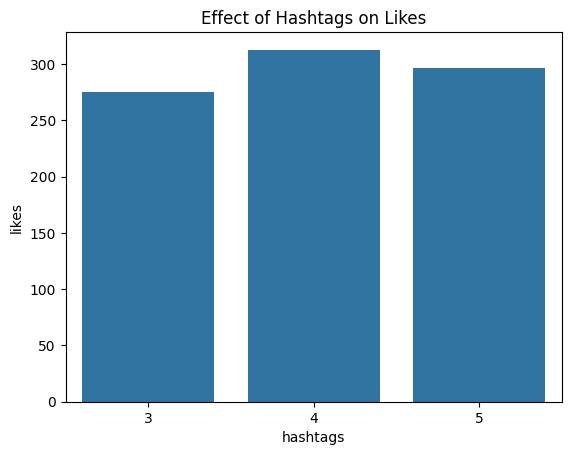

In [19]:
# Hashtag Insights
def hashtag_insights(data):
    hashtag_effect = data.groupby('hashtags')[['likes', 'shares', 'comments']].mean().reset_index()
    print(hashtag_effect)
    sns.barplot(x='hashtags', y='likes', data=hashtag_effect)
    plt.title("Effect of Hashtags on Likes")
    plt.show()

hashtag_insights(data)

      post_type       likes      shares    comments
0      Carousel  410.210526   42.596491   89.877193
1          Reel  123.050633  168.645570  280.683544
2  Static Image  401.250000   23.156250   56.875000


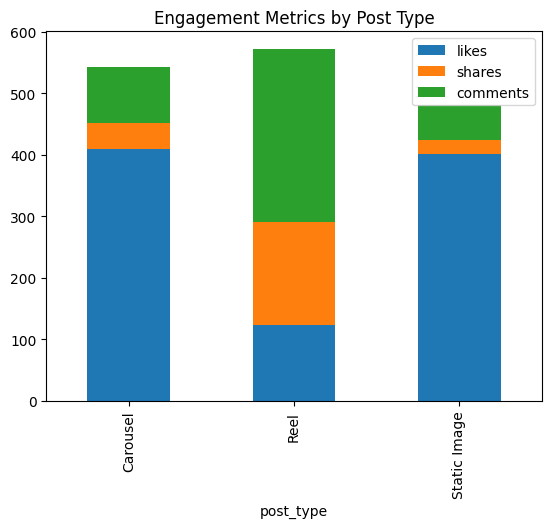

In [20]:
# Post Comparisons
def post_comparison(data):
    comparison = data.groupby('post_type')[['likes', 'shares', 'comments']].mean().reset_index()
    comparison['post_type'] = label_encoder.inverse_transform(comparison['post_type'])
    print(comparison)
    comparison.plot(kind='bar', x='post_type', stacked=True)
    plt.title("Engagement Metrics by Post Type")
    plt.show()

post_comparison(data)

Day with highest likes: Thursday
Day with highest comments: Tuesday
Day with highest shares: Tuesday
Exceptional Posts:
    date_shared day_of_week  likes  comments  shares
0    01-12-2024      Sunday     72       457     102
3    04-12-2024   Wednesday    128       466     279
4    05-12-2024    Thursday    662        81      11
9    10-12-2024     Tuesday    197       292     256
11   12-12-2024    Thursday    189       442     148
26   27-12-2024      Friday    153       447     166
35   05-12-2024    Thursday    194       440     248
54   24-12-2024     Tuesday    697        58      26
68   07-12-2024    Saturday    136       450      86
76   15-12-2024      Sunday    116       489      77
83   22-12-2024      Sunday     77       492     255
87   26-12-2024    Thursday    150       450     281
88   27-12-2024      Friday    198       231     249
99   07-12-2024    Saturday     80       156     272
105  13-12-2024      Friday    103       482     217
109  17-12-2024     Tuesday    1

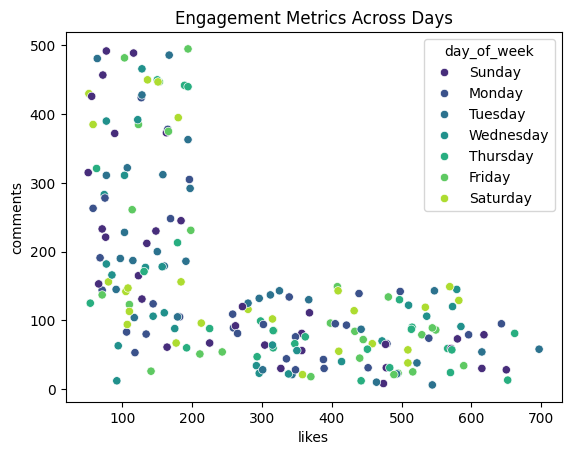

In [21]:
def detect_outliers_and_days(data):
    trend = data.groupby('day_of_week')[['likes', 'shares', 'comments']].mean().reset_index()
    top_day_likes = trend.loc[trend['likes'].idxmax(), 'day_of_week']
    top_day_comments = trend.loc[trend['comments'].idxmax(), 'day_of_week']
    top_day_shares = trend.loc[trend['shares'].idxmax(), 'day_of_week']

    print(f"Day with highest likes: {top_day_likes}")
    print(f"Day with highest comments: {top_day_comments}")
    print(f"Day with highest shares: {top_day_shares}")

    # Detect posts with exceptionally high metrics
    thresholds = {
        'likes': data['likes'].mean() + 2 * data['likes'].std(),
        'comments': data['comments'].mean() + 2 * data['comments'].std(),
        'shares': data['shares'].mean() + 2 * data['shares'].std()
    }

    exceptional_posts = data[
        (data['likes'] > thresholds['likes']) |
        (data['comments'] > thresholds['comments']) |
        (data['shares'] > thresholds['shares'])
    ]

    print("Exceptional Posts:")
    print(exceptional_posts[['date_shared', 'day_of_week', 'likes', 'comments', 'shares']])

    sns.scatterplot(data=data, x='likes', y='comments', hue='day_of_week', palette='viridis')
    plt.title("Engagement Metrics Across Days")
    plt.show()

detect_outliers_and_days(data)



In [23]:
import openai
openai.api_key = "your-api-key"

def content_suggestions(metrics):
    prompt = f"Based on these metrics {metrics}, suggest content improvements."
    try:
        response = openai.ChatCompletion.create(
            model="gpt-4o-mini",
            messages=[
                {"role": "system", "content": "You are an expert in social media engagement analysis."},
                {"role": "user", "content": prompt}
            ]
        )
        print(response['choices'][0]['message']['content'])
    except Exception as e:
        print("Error during GPT integration:", e)

example_metrics = {"average_likes": 200, "average_comments": 50, "average_shares": 30}
content_suggestions(example_metrics)


Error during GPT integration: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742



SyntaxError: invalid syntax (<ipython-input-24-c1ef6991348c>, line 1)